C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8641 - loss: 0.4685 - val_accuracy: 0.9529 - val_loss: 0.1525
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9646 - loss: 0.1163 - val_accuracy: 0.9683 - val_loss: 0.1067
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.9692 - val_loss: 0.1029
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9827 - loss: 0.0536 - val_accuracy: 0.9719 - val_loss: 0.0947
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9733 - val_loss: 0.0951
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9751 - val_loss: 0.0935
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9728 - val_loss: 0.1055
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9931 - loss: 0

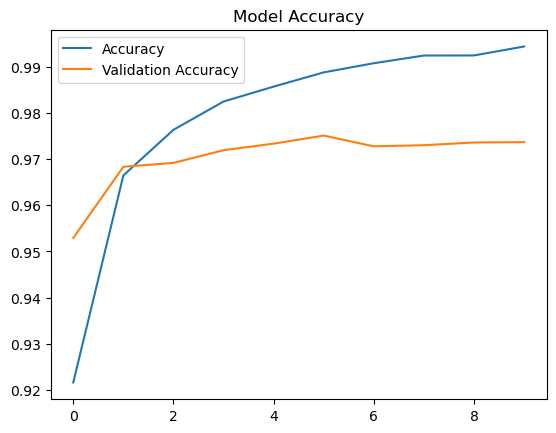

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Save and visualize performance metrics
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 1: Normalize pixel values (scale to [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2: Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Optional: Step 3 - Reshape images for dense layers
x_train = x_train.reshape(-1, 28 * 28)  # Flatten 28x28 images to 784 features
x_test = x_test.reshape(-1, 28 * 28)

print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
print("Example of one-hot encoded label:", y_train[0])

Shape of training data: (60000, 784)
Shape of test data: (10000, 784)
Example of one-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the MNIST dataset (Preprocessed)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
model = Sequential([
    # Input Layer
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784 features
    
    # Hidden Layer 1
    Dense(128, activation='relu'),  # 128 neurons with ReLU activation
    Dropout(0.2),  # Dropout to prevent overfitting
    
    # Hidden Layer 2
    Dense(64, activation='relu'),  # 64 neurons with ReLU activation
    Dropout(0.2),  # Dropout to prevent overfitting
    
    # Output Layer
    Dense(10, activation='softmax')  # 10 neurons for 10 digit classes
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for faster convergence
              loss='categorical_crossentropy',  # Loss function for multiclass classification
              metrics=['accuracy'])  # Evaluation metric

# Summary of the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=10,  # Number of epochs
                    batch_size=32,  # Batch size
                    verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 - 15s - 10ms/step - accuracy: 0.8888 - loss: 0.3664 - val_accuracy: 0.9592 - val_loss: 0.1405
Epoch 2/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9492 - loss: 0.1712 - val_accuracy: 0.9636 - val_loss: 0.1145
Epoch 3/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9619 - loss: 0.1279 - val_accuracy: 0.9706 - val_loss: 0.0995
Epoch 4/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9660 - loss: 0.1120 - val_accuracy: 0.9709 - val_loss: 0.0978
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9701 - loss: 0.0964 - val_accuracy: 0.9764 - val_loss: 0.0856
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9725 - loss: 0.0862 - val_accuracy: 0.9718 - val_loss: 0.0994
Epoch 7/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9762 - loss: 0.0759 - val_accuracy: 0.9754 - val_loss: 0.0846
Epoch 8/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9781 - loss: 0.0710 - val_accuracy: 0.9762 - val_loss: 0.0868
Epoch 9/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9798 - loss: 0.0646 - val_accuracy:

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load the MNIST dataset (Preprocessed)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
model = Sequential([
    # Input Layer
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784 features

    # Hidden Layer 1
    Dense(128, activation='relu'),  # 128 neurons with ReLU activation
    Dropout(0.2),  # Dropout to prevent overfitting

    # Hidden Layer 2
    Dense(64, activation='relu'),  # 64 neurons with ReLU activation
    Dropout(0.2),  # Dropout to prevent overfitting

    # Output Layer
    Dense(10, activation='softmax')  # 10 neurons for 10 digit classes
])

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=10,  # Number of epochs
                    batch_size=32,  # Batch size
                    verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
1500/1500 - 12s - 8ms/step - accuracy: 0.8738 - loss: 0.4159 - val_accuracy: 0.9542 - val_loss: 0.1531
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9410 - loss: 0.1976 - val_accuracy: 0.9630 - val_loss: 0.1215
Epoch 3/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9539 - loss: 0.1549 - val_accuracy: 0.9679 - val_loss: 0.1069
Epoch 4/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9605 - loss: 0.1313 - val_accuracy: 0.9715 - val_loss: 0.0991
Epoch 5/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9646 - loss: 0.1153 - val_accuracy: 0.9722 - val_loss: 0.0977
Epoch 6/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9690 - loss: 0.1009 - val_accuracy: 0.9749 - val_loss: 0.0857
Epoch 7/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9714 - loss: 0.0931 - val_accuracy: 0.9758 - val_loss: 0.0849
Epoch 8/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9725 - loss: 0.0869 - val_accuracy: 0.9762 - val_loss: 0.0835
Epoch 9/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9747 - loss: 0.0798 - val_accuracy: 0.9778 -

Test Loss: 0.0741
Test Accuracy: 0.9766
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



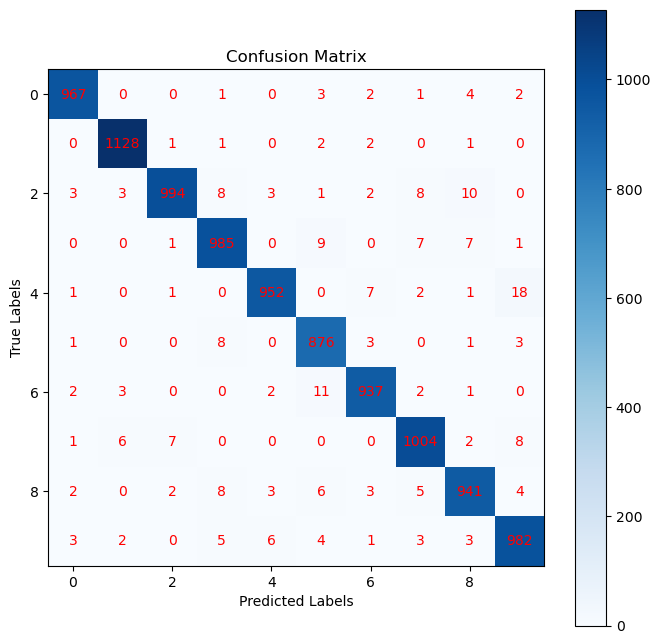

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)          # True class labels

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Add text annotations to the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


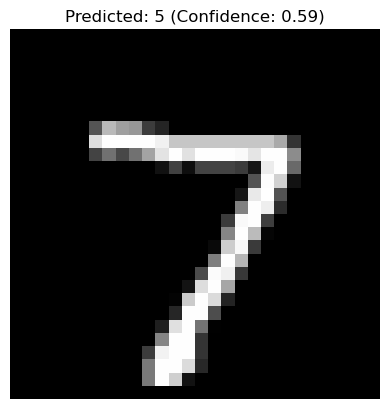

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess single image
def preprocess_image(image):
    """
    Prepares a single image for prediction by normalizing and reshaping it.
    """
    # Normalize pixel values
    image = image / 255.0
    # Reshape for model compatibility
    if len(image.shape) == 2:  # Single image (28x28)
        image = image.reshape(1, 28, 28)
    return image

# Function to make predictions
def predict_digit(image, model):
    """
    Predicts the digit class for a single image.
    """
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability
    confidence = np.max(prediction)  # Get the confidence of the prediction
    return predicted_class, confidence

# Test the prediction function
def display_prediction(image, model):
    """
    Displays the input image and its predicted class.
    """
    predicted_class, confidence = predict_digit(image, model)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_class} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

# Example: Predict a digit from the test dataset
sample_image = x_test[0].reshape(28, 28)  # Extract a single image
display_prediction(sample_image, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Classes for Batch: [5 5 5 5 5 5 5 5 5 5]


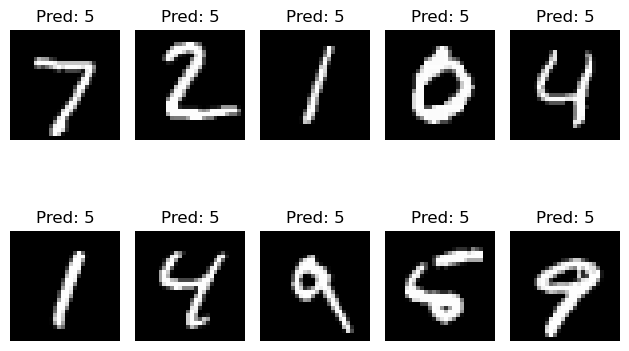

In [7]:
# Function for batch predictions
def predict_batch(images, model):
    """
    Predicts digit classes for a batch of images.
    """
    # Preprocess the batch of images
    images = images / 255.0  # Normalize pixel values
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)  # Get class with highest probability for each image
    return predicted_classes

# Example: Predict a batch of images
batch_predictions = predict_batch(x_test[:10], model)  # Predict the first 10 test images
print("Predicted Classes for Batch:", batch_predictions)

# Visualize predictions for the batch
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {batch_predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Test Loss: 0.0741
Test Accuracy: 0.9766
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



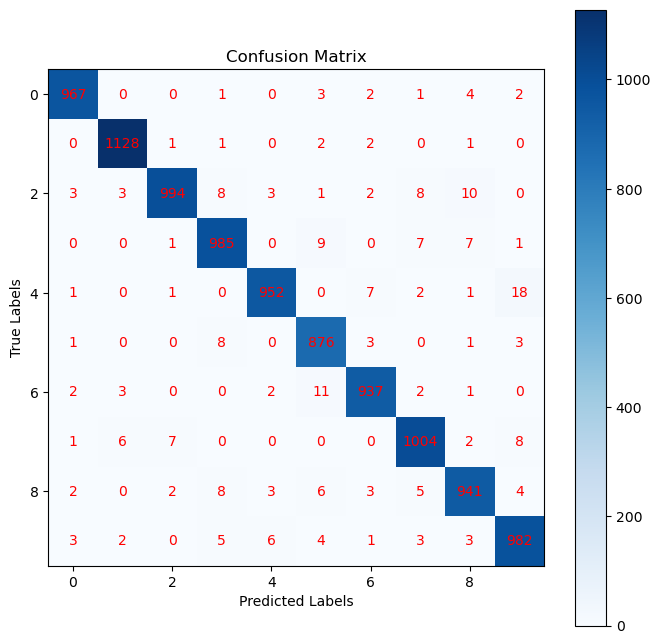

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)          # True class labels

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Add text annotations to the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

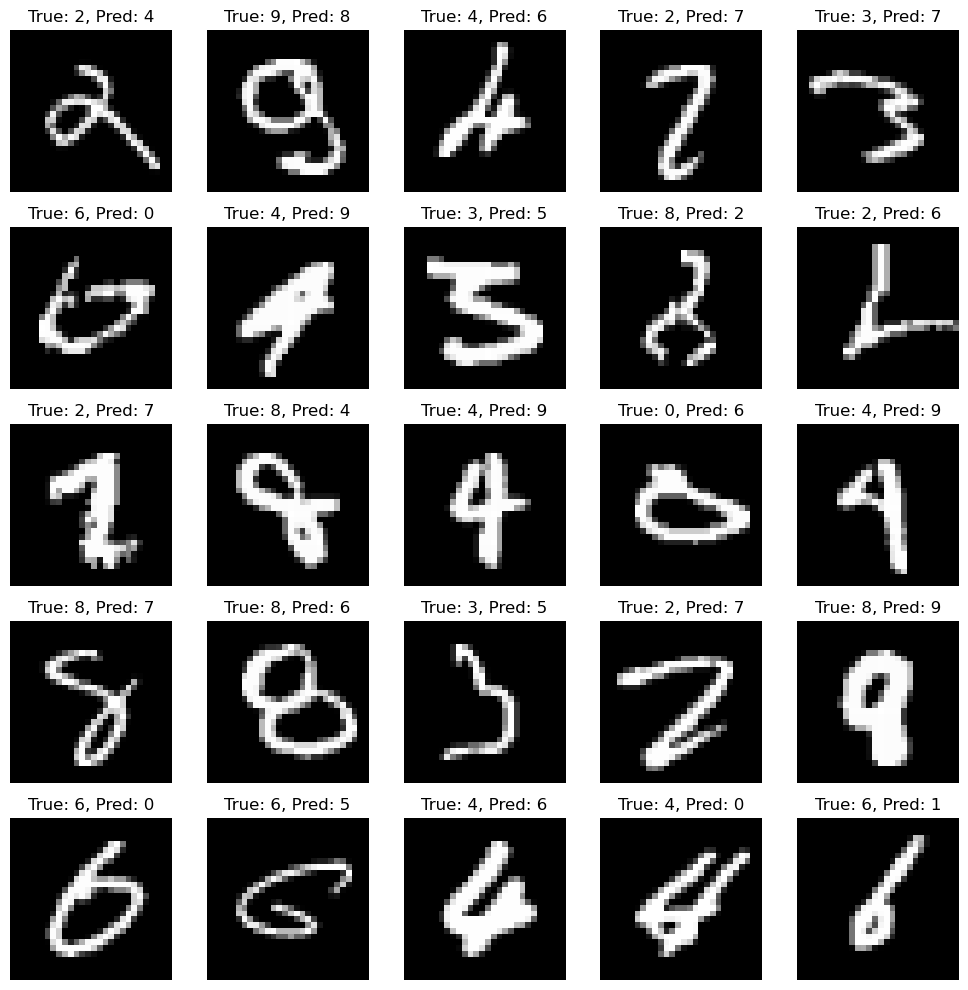

In [9]:
# Identify misclassified indices
misclassified_idx = np.where(y_pred_classes != y_true)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    zoom_range=0.1          # Zoom images by up to 10%
)

# Reshape the training data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension for grayscale images
x_test = x_test.reshape(-1, 28, 28, 1)    # Same for test data

# Fit the generator to the reshaped training data
datagen.fit(x_train)

# Train the model using the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10


C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8283 - loss: 0.5796

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [29]:
# Reshape the training and testing datasets to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)    # Add channel dimension

# Fit the generator to the reshaped training data
datagen.fit(x_train)

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape

# Define the model with the correct input shape for augmented data
model = Sequential([
    # Input Layer: Reshape to handle augmented data
    Reshape((28, 28, 1), input_shape=(28, 28, 1)),

    # Flatten Layer
    Flatten(),

    # Hidden Layers
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),

    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
    zoom_range=0.1          # Zoom images by up to 10%
)

# Reshape the datasets to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Fit the data augmentation generator
datagen.fit(x_train)

# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.6557 - loss: 1.0409 - val_accuracy: 0.9494 - val_loss: 0.1677
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8798 - loss: 0.3898 - val_accuracy: 0.9631 - val_loss: 0.1253
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9012 - loss: 0.3129 - val_accuracy: 0.9642 - val_loss: 0.1111
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9125 - loss: 0.2873 - val_accuracy: 0.9706 - val_loss: 0.0919
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9204 - loss: 0.2568 - val_accuracy: 0.9755 - val_loss: 0.0823
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9256 - loss: 0.2441 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9291 - loss: 0.2316 - val_accuracy: 0.9784 - val_loss: 0.0678
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9327 -

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
cnn_model = Sequential([
    # Reshape input data
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    # Convolutional Layer 1
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Layer 2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train,
                            validation_data=(x_test.reshape(-1, 28, 28, 1), y_test),
                            epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.8631 - loss: 0.4333 - val_accuracy: 0.9844 - val_loss: 0.0464
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9764 - loss: 0.0773 - val_accuracy: 0.9895 - val_loss: 0.0322
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9830 - loss: 0.0547 - val_accuracy: 0.9893 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accuracy: 0.9916 - val_loss: 0.0263
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9921 - val_loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9911 - val_loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9920 -

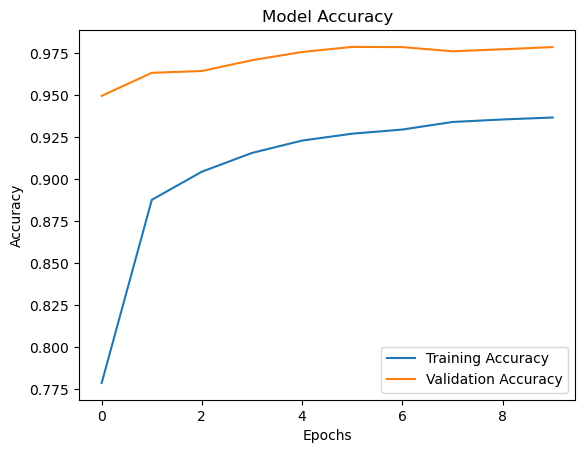

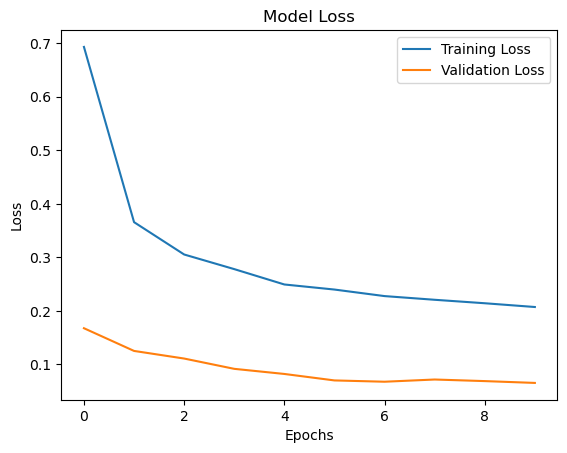

In [37]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

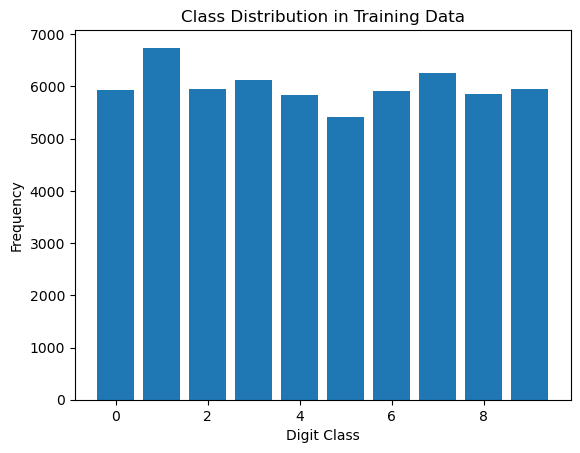

Digit 0: 5923.0 samples
Digit 1: 6742.0 samples
Digit 2: 5958.0 samples
Digit 3: 6131.0 samples
Digit 4: 5842.0 samples
Digit 5: 5421.0 samples
Digit 6: 5918.0 samples
Digit 7: 6265.0 samples
Digit 8: 5851.0 samples
Digit 9: 5949.0 samples


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Count the frequency of each class in the training dataset
class_counts = np.sum(y_train, axis=0)

# Plot the class distribution
plt.bar(range(10), class_counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.show()

# Print the distribution
for i, count in enumerate(class_counts):
    print(f"Digit {i}: {count} samples")

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Reshape data for SMOTE (flatten images)
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_flat, y_train)

# Reshape back to original image dimensions
x_train_balanced = x_train_balanced.reshape(-1, 28, 28, 1)

In [43]:
# Calculate class weights
class_weights = {i: max(class_counts) / class_counts[i] for i in range(len(class_counts))}

# Train the model with class weights
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    class_weight=class_weights)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9643 - loss: 0.1303 - val_accuracy: 0.9833 - val_loss: 0.0488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9733 - loss: 0.0965 - val_accuracy: 0.9833 - val_loss: 0.0468
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9763 - loss: 0.0877 - val_accuracy: 0.9858 - val_loss: 0.0505
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9793 - loss: 0.0747 - val_accuracy: 0.9834 - val_loss: 0.0497
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9807 - loss: 0.0693 - val_accuracy: 0.9836 - val_loss: 0.0524
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9812 - loss: 0.0650 - val_accuracy: 0.9837 - val_loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9824 - loss: 0.0615 - val_accuracy: 0.9830 - val_loss: 0.0562
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9832 - loss: 0

In [45]:
# Define data augmentation only for minority classes
minority_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Generate more data for a specific class (e.g., class 1)
x_minority = x_train[y_train.argmax(axis=1) == 1]  # Extract minority class
y_minority = y_train[y_train.argmax(axis=1) == 1]

# Augment the minority class data
minority_generator = minority_datagen.flow(x_minority, y_minority, batch_size=32)

In [47]:
from sklearn.utils import resample

# Combine x_train and y_train for sampling
data = list(zip(x_train, y_train))

# Separate classes
class_data = {i: [d for d in data if d[1].argmax() == i] for i in range(10)}

# Resample each class to the size of the smallest class
min_samples = min(len(class_data[i]) for i in range(10))
balanced_data = [resample(class_data[i], n_samples=min_samples, random_state=42) for i in range(10)]

# Recombine the balanced dataset
x_train_balanced, y_train_balanced = zip(*[item for sublist in balanced_data for item in sublist])
x_train_balanced = np.array(x_train_balanced)
y_train_balanced = np.array(y_train_balanced)

In [49]:
from sklearn.metrics import classification_report

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0     0.9908    0.9898    0.9903       980
           1     0.9912    0.9947    0.9930      1135
           2     0.9760    0.9864    0.9812      1032
           3     0.9851    0.9842    0.9846      1010
           4     0.9836    0.9796    0.9816       982
           5     0.9799    0.9832    0.9815       892
           6     0.9844    0.9864    0.9854       958
           7     0.9854    0.9815    0.9834      1028
           8     0.9856    0.9825    0.9841       974
           9     0.9810    0.9742    0.9776      1009

    accuracy                         0.9844     10000
   macro avg     0.9843    0.9843    0.9843     10000
weighted avg     0.9844    0.9844    0.9844     10000



In [51]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))  # Dropout rate of 50%

In [53]:
from tensorflow.keras.regularizers import l2
Dense(128, activation='relu', kernel_regularizer=l2(0.01))

<Dense name=dense_14, built=False>

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [61]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [63]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8094 - loss: 1.2215 - val_accuracy: 0.9535 - val_loss: 0.4693
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9310 - loss: 0.5340 - val_accuracy: 0.9545 - val_loss: 0.4003
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9393 - loss: 0.4599 - val_accuracy: 0.9586 - val_loss: 0.3845
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9402 - loss: 0.4514 - val_accuracy: 0.9629 - val_loss: 0.3511
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9401 - loss: 0.4425 - val_accuracy: 0.9613 - val_loss: 0.3615
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9442 - loss: 0.4267 - val_accuracy: 0.9602 - val_loss: 0.3626
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9419 - loss: 0.4348 - val_accuracy: 0.9606 - val_loss: 0.3526
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9436 -

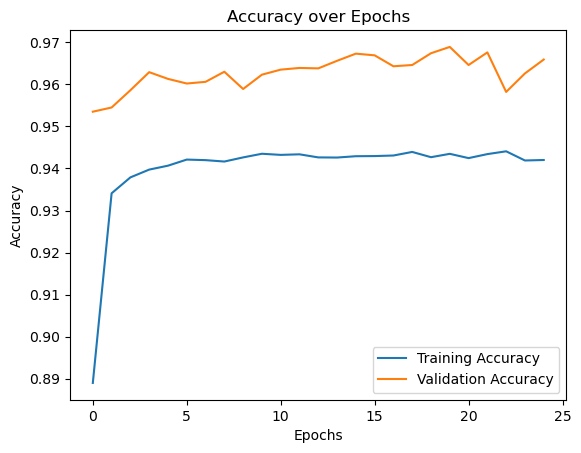

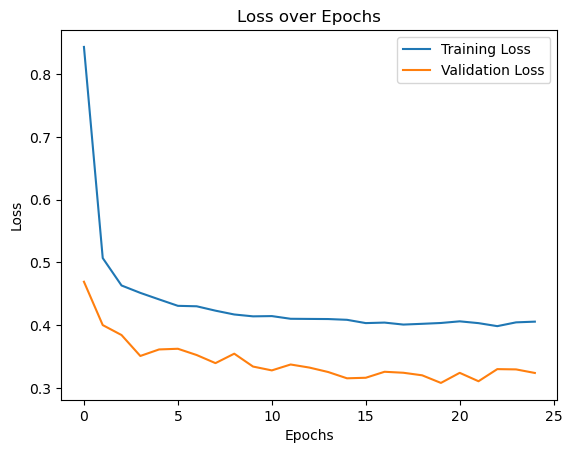

In [66]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model
model = Sequential([
    # Flatten the input (28x28 pixels) into a 1D array
    Flatten(input_shape=(28, 28)),
    
    # Hidden Layer 1 with ReLU activation
    Dense(256, activation='relu'),
    
    # Hidden Layer 2 with ReLU activation
    Dense(128, activation='relu'),
    
    # Dropout to prevent overfitting
    Dropout(0.3),
    
    # Output Layer with Softmax activation for 10 classes
    Dense(10, activation='softmax')
])

In [71]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8712 - loss: 0.4273 - val_accuracy: 0.9691 - val_loss: 0.1018
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9673 - loss: 0.1058 - val_accuracy: 0.9735 - val_loss: 0.0833
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9790 - loss: 0.0683 - val_accuracy: 0.9746 - val_loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9787 - val_loss: 0.0748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9767 - val_loss: 0.0822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9888 - loss: 0.0338 - val_accuracy: 0.9799 - val_loss: 0.0731
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9908 - loss: 0.0270 - val_accuracy: 0.9804 - val_loss: 0.0745
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9921 - loss: 0

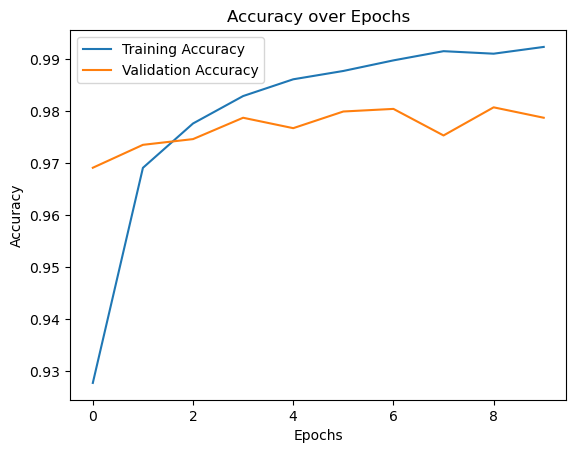

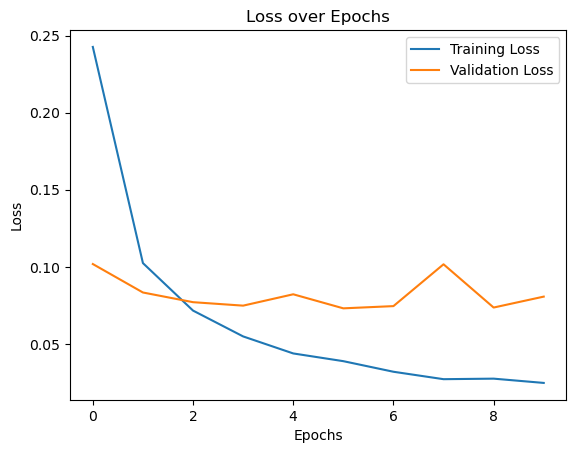

In [75]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
from tensorflow.keras.layers import LeakyReLU

Dense(128, activation=LeakyReLU(alpha=0.01))

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<Dense name=dense_27, built=False>

In [79]:
Dense(128, activation='elu')

<Dense name=dense_28, built=False>

In [81]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9787


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9808    0.9918    0.9863       980
           1     0.9877    0.9877    0.9877      1135
           2     0.9806    0.9777    0.9791      1032
           3     0.9811    0.9782    0.9797      1010
           4     0.9787    0.9807    0.9797       982
           5     0.9850    0.9596    0.9722       892
           6     0.9772    0.9864    0.9818       958
           7     0.9881    0.9728    0.9804      1028
           8     0.9569    0.9805    0.9686       974
           9     0.9702    0.9693    0.9698      1009

    accuracy                         0.9787     10000
   macro avg     0.9786    0.9785    0.9785     10000
weighted avg     0.9788    0.9787    0.9787     10000



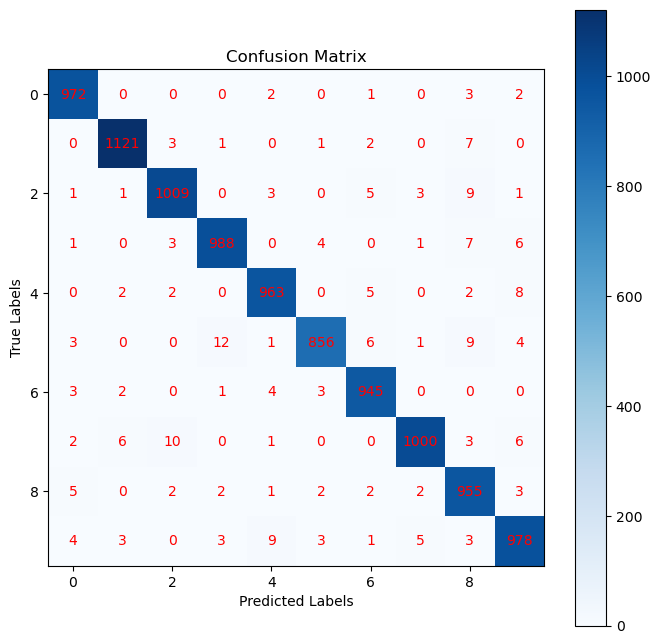

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)          # True class labels

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

# Add text annotations to the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9788
Recall: 0.9787
F1-Score: 0.9787


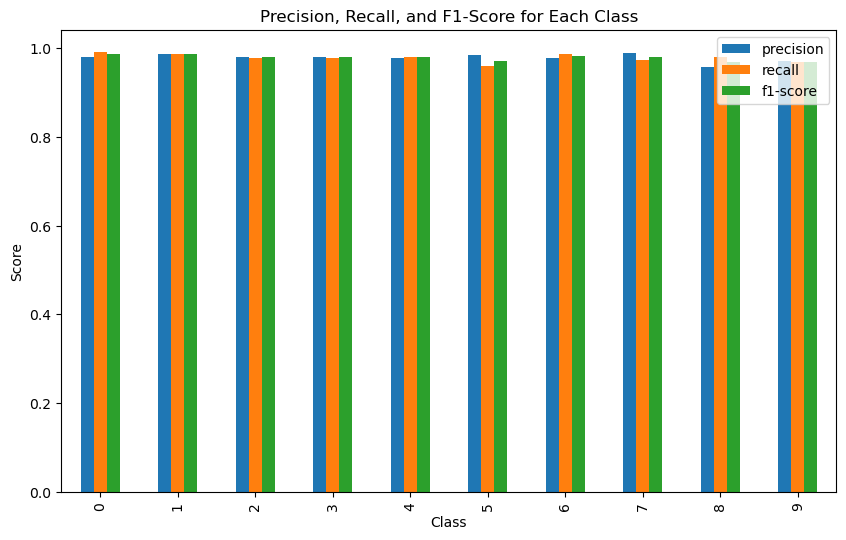

In [87]:
import pandas as pd

# Get metrics for each class
report = classification_report(y_true, y_pred_classes, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Filter metrics for each class
class_metrics = metrics_df.iloc[:10, :3]  # Precision, Recall, F1 for classes 0-9

# Plot the metrics
class_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.show()

In [89]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameters
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [32, 64, 128]
epochs = [10, 20]

# Iterate through hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in epochs:
            print(f"Training with LR={lr}, Batch Size={batch_size}, Epochs={num_epochs}")
            
            # Compile the model with the current learning rate
            model.compile(optimizer=Adam(learning_rate=lr),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
            
            # Train the model
            history = model.fit(x_train, y_train,
                                validation_data=(x_test, y_test),
                                epochs=num_epochs,
                                batch_size=batch_size,
                                callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
                                verbose=0)
            
            # Evaluate the model
            val_accuracy = history.history['val_accuracy'][-1]
            print(f"Validation Accuracy: {val_accuracy:.4f}")

Training with LR=0.1, Batch Size=32, Epochs=10
Validation Accuracy: 0.0980
Training with LR=0.1, Batch Size=32, Epochs=20
Validation Accuracy: 0.1135
Training with LR=0.1, Batch Size=64, Epochs=10
Validation Accuracy: 0.1028
Training with LR=0.1, Batch Size=64, Epochs=20
Validation Accuracy: 0.1135
Training with LR=0.1, Batch Size=128, Epochs=10
Validation Accuracy: 0.0958
Training with LR=0.1, Batch Size=128, Epochs=20
Validation Accuracy: 0.0892
Training with LR=0.01, Batch Size=32, Epochs=10
Validation Accuracy: 0.1028
Training with LR=0.01, Batch Size=32, Epochs=20
Validation Accuracy: 0.1135
Training with LR=0.01, Batch Size=64, Epochs=10
Validation Accuracy: 0.1135
Training with LR=0.01, Batch Size=64, Epochs=20
Validation Accuracy: 0.1135
Training with LR=0.01, Batch Size=128, Epochs=10
Validation Accuracy: 0.1135
Training with LR=0.01, Batch Size=128, Epochs=20
Validation Accuracy: 0.1028
Training with LR=0.001, Batch Size=32, Epochs=10
Validation Accuracy: 0.1135
Training with

In [90]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [93]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

# Define a model-building function
def build_model(hp):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.1, 0.01, 0.001])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='mnist_tuning'
)

# Perform the search
tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Retrieve the best model and hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Reloading Tuner from my_dir\mnist_tuning\tuner0.json
Best hyperparameters: {'units': 128, 'learning_rate': 0.001}


C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8754 - loss: 0.4371 - val_accuracy: 0.9579 - val_loss: 0.1443
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.1232 - val_accuracy: 0.9700 - val_loss: 0.0957
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9761 - loss: 0.0789 - val_accuracy: 0.9749 - val_loss: 0.0841
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9751 - val_loss: 0.0762
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9744 - val_loss: 0.0767
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0323 - val_accuracy: 0.9783 - val_loss: 0.0745
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9786 - val_loss: 0.0739
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0189 - 

In [95]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define a model-building function
def build_model(learning_rate=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model in a KerasClassifier using scikeras
model = KerasClassifier(model=build_model, verbose=0)

# Define the hyperparameter grid
param_distributions = {
    'model__learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3)
random_search.fit(x_train, y_train)

# Display the best parameters
print(f"Best Hyperparameters: {random_search.best_params_}")

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not p

Best Hyperparameters: {'model__learning_rate': 0.001, 'epochs': 10, 'batch_size': 32}


In [99]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.1146
Test Accuracy: 0.9814


In [104]:
# Example: Train a Sequential model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [106]:
# Fit the KerasClassifier
model.fit(x_train, y_train)

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KerasClassifier(
	model=<function build_model at 0x0000022852778E00>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [108]:
# Example: Predict the class of a single image
sample_image = x_test[0].reshape(28, 28)
predicted_class, confidence, probabilities = predict_digit(sample_image, model)
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

Predicted Class: 5
Confidence: 1.00


In [110]:
import numpy as np

# Function to preprocess a single image
def preprocess_image(image):
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = image.reshape(1, 28, 28, 1)  # Reshape for model compatibility
    return image

# Function to make a prediction
def predict_digit(image, model):
    preprocessed_image = preprocess_image(image)
    probabilities = model.predict(preprocessed_image)  # Get probabilities for each class
    predicted_class = np.argmax(probabilities)  # Class with the highest probability
    confidence = np.max(probabilities)  # Confidence of the prediction
    return predicted_class, confidence, probabilities

# Example: Predict the class of a sample image
sample_image = x_test[0].reshape(28, 28)  # Extract a single image from the test set
predicted_class, confidence, probabilities = predict_digit(sample_image, model)
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")
print(f"Probabilities: {probabilities}")

Predicted Class: 5
Confidence: 1.00
Probabilities: [[0 0 0 0 0 1 0 0 0 0]]


In [112]:
# Function to predict a batch of images
def predict_batch(images, model):
    images = images / 255.0  # Normalize
    predictions = model.predict(images)  # Get probabilities for each class
    predicted_classes = np.argmax(predictions, axis=1)  # Class with highest probability
    confidences = np.max(predictions, axis=1)  # Confidence of each prediction
    return predicted_classes, confidences, predictions

# Example: Predict the first 10 images in the test set
batch_predictions, batch_confidences, batch_probabilities = predict_batch(x_test[:10], model)
print(f"Predicted Classes: {batch_predictions}")
print(f"Confidences: {batch_confidences}")

Predicted Classes: [5 5 5 5 5 5 5 5 5 5]
Confidences: [1 1 1 1 1 1 1 1 1 1]


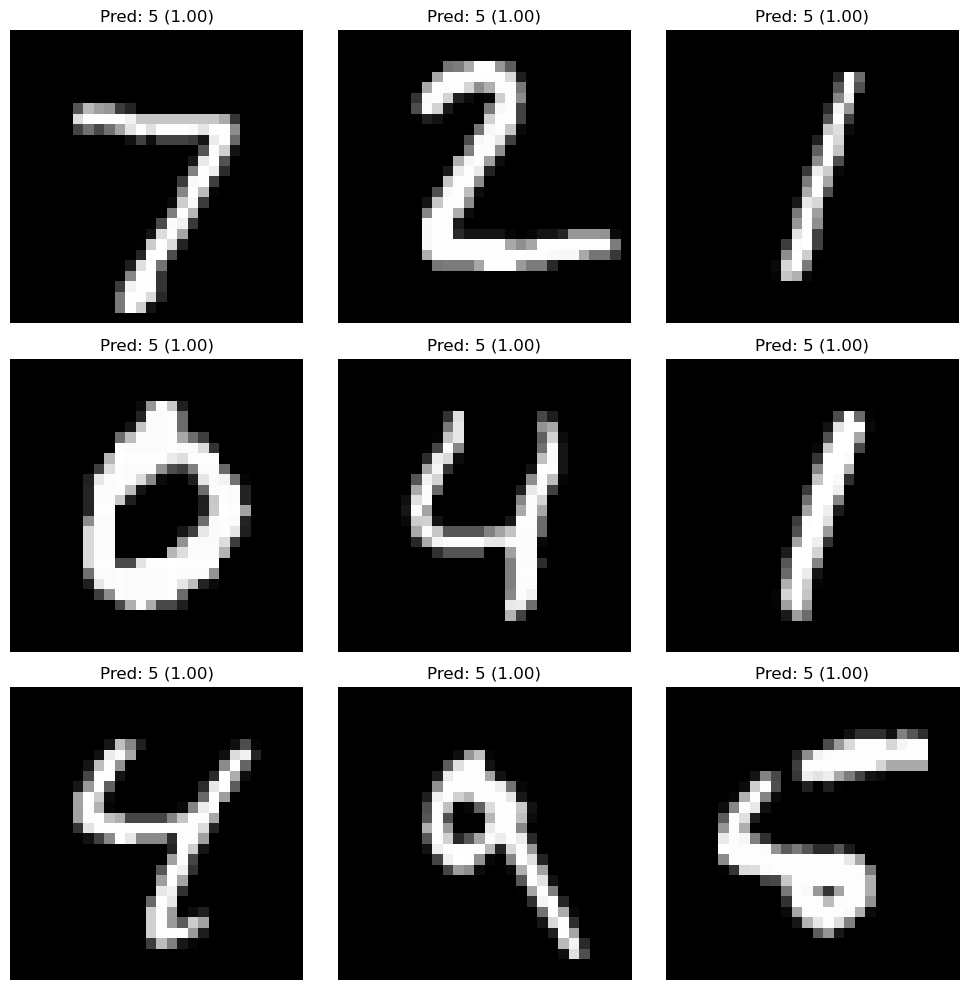

In [114]:
import matplotlib.pyplot as plt

# Visualize predictions
def display_predictions(images, predicted_classes, confidences):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_classes[i]} ({confidences[i]:.2f})")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 9 predictions
display_predictions(x_test[:9], batch_predictions[:9], batch_confidences[:9])

In [116]:
def apply_temperature_scaling(logits, T):
    scaled_logits = logits / T
    probabilities = tf.nn.softmax(scaled_logits).numpy()
    return probabilities

In [118]:
def top_n_predictions(image, model, n=3):
    preprocessed_image = preprocess_image(image)
    probabilities = model.predict(preprocessed_image).flatten()
    top_indices = np.argsort(probabilities)[-n:][::-1]
    top_classes = [(i, probabilities[i]) for i in top_indices]
    return top_classes

# Example: Top 3 predictions for a single image
top_predictions = top_n_predictions(sample_image, model)
print("Top Predictions:")
for digit, prob in top_predictions:
    print(f"Digit: {digit}, Probability: {prob:.2f}")

Top Predictions:
Digit: 5, Probability: 1.00
Digit: 9, Probability: 0.00
Digit: 8, Probability: 0.00


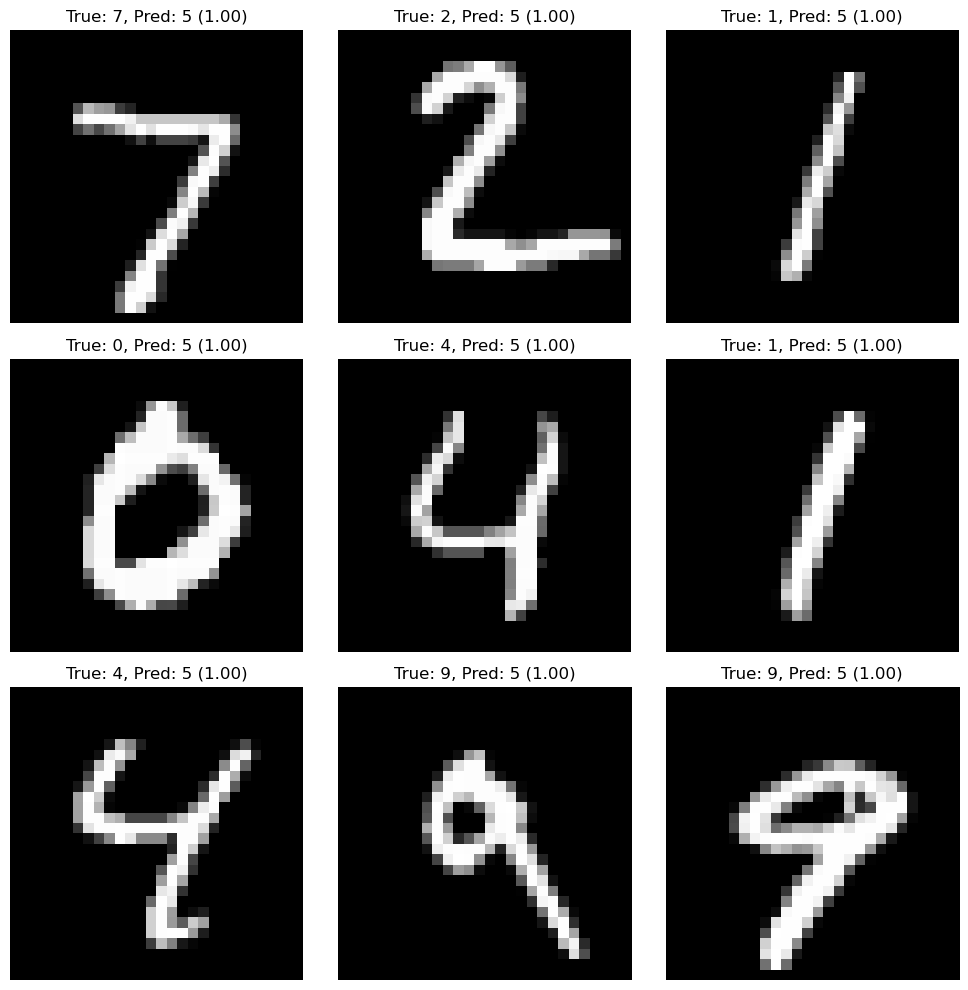

In [120]:
# Find misclassified samples
misclassified_indices = np.where(batch_predictions != np.argmax(y_test[:10], axis=1))[0]

# Visualize misclassified samples
def display_misclassified(images, true_labels, predicted_labels, confidences):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_indices[:9]):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]} ({confidences[idx]:.2f})")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

true_labels = np.argmax(y_test[:10], axis=1)
display_misclassified(x_test, true_labels, batch_predictions, batch_confidences)